In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scikitplot as skplot
from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
data = pd.read_csv('dataset/Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [6]:
# data['Gender'].astype('category')

In [7]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [8]:
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 0
data.head()
data.drop('User ID', axis=1, inplace=True)

C:\Python36\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
X = data.drop('Purchased', axis=1)
Y = pd.DataFrame(data['Purchased'])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.90, random_state=5)

In [11]:
classifier  = LogisticRegression(multi_class='ovr', max_iter=200)

In [12]:
classifier.fit(X_train, Y_train)

C:\Python36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print(classifier.score(X_test, Y_test))
y_pred = classifier.predict(X_test)

0.691666666667


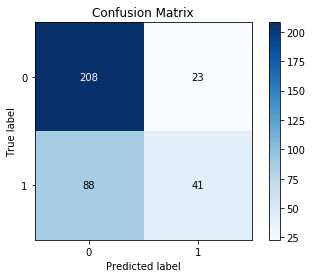

In [14]:
skplot.metrics.plot_confusion_matrix(Y_test, y_pred)

In [15]:
# classifier.predict_proba([1, 66, 75000])
classifier.predict_proba([1, 20, 1000])

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.87539881,  0.12460119]])

In [16]:
# data = load_digits()

In [17]:
# data.target

In [18]:
from sklearn import tree
import graphviz

In [19]:
cls = tree.DecisionTreeClassifier()

In [20]:
tree_model = cls.fit(X_train,Y_train)

In [21]:
print(tree_model.score(X_test,Y_test))
y_pred_tree = tree_model.predict(X_test)

0.891666666667


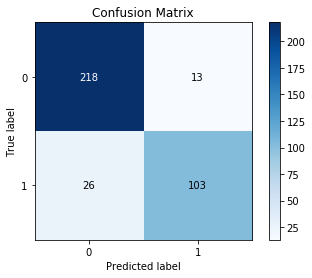

In [22]:
skplot.metrics.plot_confusion_matrix(Y_test, y_pred_tree)

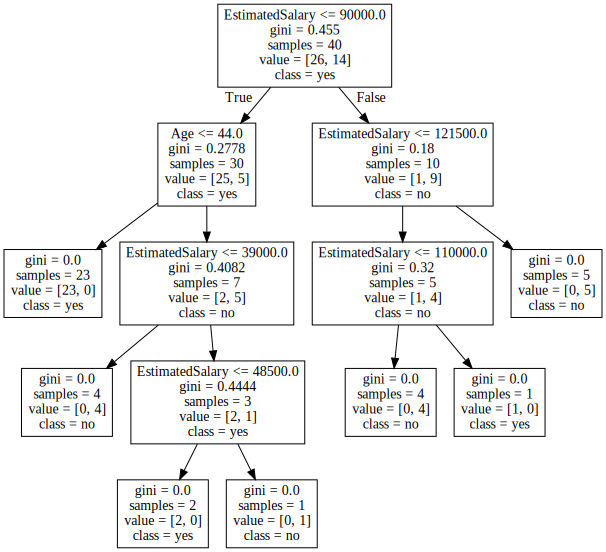

In [23]:
source = tree.export_graphviz(tree_model, out_file=None, feature_names=X_train.columns,
                              class_names=["yes","no"])
graph = graphviz.Source(source)
graph

In [24]:
Y_train.columns

Index(['Purchased'], dtype='object')

In [25]:
from sklearn import ensemble

In [26]:
random_forest = ensemble.RandomForestClassifier(n_estimators=20).fit(X_train,Y_train)
random_forest.score(X_test,Y_test)

C:\Python36\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.82222222222222219

In [27]:
bagging = ensemble.BaggingClassifier(n_estimators=20).fit(X_train,Y_train)
bagging.score(X_test,Y_test)

C:\Python36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.90000000000000002

In [28]:
# X['Purchased'] = Y['Purchased']

In [29]:
# X.corr()